<a href="https://colab.research.google.com/github/YersonMamani/GR07-Regresion_Clasificacion/blob/main/Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**CLASIFICACION DE MUERTE POR INSUFICIENCIA CARDIACA**


La insuficiencia cardíaca es un evento común causado por ECV y este conjunto de datos contiene 12 características que se pueden usar para predecir la mortalidad por insuficiencia cardíaca.

La mayoría de las enfermedades cardiovasculares pueden prevenirse abordando los factores de riesgo conductuales como el consumo de tabaco, la dieta poco saludable y la obesidad, la inactividad física y el uso nocivo del alcohol utilizando estrategias para toda la población.

-----------------------------------------------------

**¿Que es la insuficiencia cardiaca?**

La insuficiencia cardíaca es una condición médica crónica en la cual el corazón no puede bombear suficiente sangre para satisfacer las necesidades del cuerpo. El corazón es responsable de bombear la sangre rica en oxígeno a través del sistema circulatorio para suministrar nutrientes y oxígeno a los tejidos y órganos del cuerpo.


La enfermedad cardiovascular incluye varias afecciones, como la enfermedad coronaria, el infarto de miocardio (ataque al corazón), la angina de pecho, la insuficiencia cardíaca, los trastornos del ritmo cardíaco, las enfermedades de las válvulas cardíacas, las enfermedades arteriales periféricas y los accidentes cerebrovasculares (derrames cerebrales).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

1.**El código carga un archivo CSV de registros clínicos de insuficiencia cardíaca en un DataFrame y lo convierte en una matriz llamada "data".**

In [ ]:
# Load the heart_failure dataset
df = pd.read_csv('/content/heart_failure_clinical_records_dataset2.csv')
data = df.values
df

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


**2. Aislamiento de datos para los conjuntos de entrenamiento y prueba, por otro lado los datos que se normalizaran y escalaran de los datos que no**

In [ ]:
#data
#Dividir el conjunto de datos de entrenamiento y prueba
train_df= df.sample(frac=0.8, random_state=0)
test_df= df.drop(train_df.index)

train_features = train_df.drop(["DEATH_EVENT", "diabetes", "high_blood_pressure", "sex", "smoking","anemia"], axis=1)
train_labels = train_df[["DEATH_EVENT", "diabetes", "high_blood_pressure", "sex", "smoking","anemia"]]

# Separar las características y las etiquetas de prueba
test_features = test_df.drop(["DEATH_EVENT", "diabetes", "high_blood_pressure", "sex", "smoking","anemia"], axis=1)
test_labels = test_df[["DEATH_EVENT", "diabetes", "high_blood_pressure", "sex", "smoking","anemia"]]

#normalizamos las caracteristicas
train_min = train_features.min() #minimo de cada columna
train_max = train_features.max() #maximo de cada columna

train_features = (train_features - train_min) / (train_max -train_min)
test_features = (test_features - train_min) / (train_max -train_min)


#escalamos las caracteristicas
train_mean = train_features.mean() #media de cada columna
train_std = train_features.std() #desviacion estandar de cada columna

train_features = (train_features - train_mean) / train_std
test_features = (test_features - train_mean) / train_std


**3. Impresion de datos de entrenamiento y prueba**

In [ ]:
train_labels

,DEATH_EVENT,diabetes,high_blood_pressure,sex,smoking,anemia
206,0,0,0,0,0,1
188,0,1,1,0,0,1
12,1,0,0,1,0,1
219,0,1,1,0,0,0
237,0,0,0,1,0,0
...,...,...,...,...,...,...
119,1,0,0,0,0,0
102,0,0,0,1,1,0
35,1,1,0,1,0,0
57,0,0,0,1,1,1


In [ ]:
train_features

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
206,-1.753603,-0.527321,0.214986,-0.401528,-0.610544,1.030806,0.738862
188,-0.017662,-0.469847,0.214986,-0.659290,-0.398620,-0.099298,0.546039
12,-1.333624,0.484228,-0.620489,-1.329473,-0.292659,0.126723,-1.523605
219,-0.493666,0.025582,-0.202751,1.093495,-0.716506,0.804785,0.867412
237,0.766271,-0.376738,-0.620489,-0.947985,-0.186697,-1.003380,1.034526
...,...,...,...,...,...,...,...
119,2.110205,0.025582,0.047891,-0.016348,0.480863,-0.551339,-0.443791
102,1.606230,0.388820,-1.038227,-1.195437,-0.292659,1.708868,-0.546630
35,0.682276,0.025582,-0.202751,-0.380907,2.250425,-0.551339,-1.279361
57,-0.073687,0.054319,0.214986,-0.504633,-0.822468,0.352744,-0.970843


In [ ]:
test_features

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
1,-0.493666,8.392700,0.047891,-0.016348,-0.292659,-0.099298,-1.587879
9,1.606230,-0.502033,-0.202751,1.268773,8.502172,-0.777360,-1.536460
17,-1.333624,0.025582,-1.957250,-1.020158,-0.610544,-2.133484,-1.485040
25,1.606230,-0.473295,0.047891,-1.195437,0.555036,1.708868,-1.369345
28,-0.241678,-0.574450,0.047891,-1.154195,4.687547,-0.551339,-1.330781
31,2.026209,-0.616981,0.632724,0.980079,1.720616,-1.003380,-1.305071
32,-0.913645,-0.357197,-0.202751,0.557349,-0.398620,-1.907463,-1.305071
38,-0.073687,2.409619,-0.620489,0.413002,0.978883,0.126723,-1.279361
39,-0.073687,-0.373290,0.047891,0.660454,1.720616,1.256826,-1.279361
42,0.766271,0.012938,0.632724,-0.824259,-0.186697,0.578764,-1.240796


In [ ]:
test_labels

,DEATH_EVENT,diabetes,high_blood_pressure,sex,smoking,anemia
1,1,0,0,1,0,0
9,1,0,1,1,1,1
17,1,0,0,1,0,0
25,1,1,0,1,1,0
28,1,0,0,1,0,1
31,1,0,0,1,0,0
32,1,1,1,0,0,1
38,0,1,0,1,0,0
39,1,1,0,0,0,0
42,1,1,1,1,1,0


**4.Encadenamiento de datos de entrenamiento y prueba**

In [ ]:
#Se agrega columnas adicionales al conjunto de características de entrenamiento (train_features) provenientes del DataFrame train_labels
additional_columns = train_labels[["diabetes", "high_blood_pressure", "sex", "smoking","anemia"]].values.astype(np.float32)
train_features = np.concatenate((train_features, additional_columns), axis=1)

In [ ]:
#muestra la cantidad de columnas en el array train_features
num_columns1 = train_features.shape[1]
print("Número de columnas de train_features:", num_columns1)

Número de columnas de train_features: 12


In [ ]:
#Crea un DataFrame llamado train_features_df a partir del array train_features
train_features_df = pd.DataFrame(train_features)
print(train_features_df)

           0         1         2         3         4         5         6   \
0   -1.753603 -0.527321  0.214986 -0.401528 -0.610544  1.030806  0.738862   
1   -0.017662 -0.469847  0.214986 -0.659290 -0.398620 -0.099298  0.546039   
2   -1.333624  0.484228 -0.620489 -1.329473 -0.292659  0.126723 -1.523605   
3   -0.493666  0.025582 -0.202751  1.093495 -0.716506  0.804785  0.867412   
4    0.766271 -0.376738 -0.620489 -0.947985 -0.186697 -1.003380  1.034526   
..        ...       ...       ...       ...       ...       ...       ...   
234  2.110205  0.025582  0.047891 -0.016348  0.480863 -0.551339 -0.443791   
235  1.606230  0.388820 -1.038227 -1.195437 -0.292659  1.708868 -0.546630   
236  0.682276  0.025582 -0.202751 -0.380907  2.250425 -0.551339 -1.279361   
237 -0.073687  0.054319  0.214986 -0.504633 -0.822468  0.352744 -0.970843   
238  0.766271  0.316402 -0.202751  0.413002 -0.610544 -0.777360  0.198956   

      7    8    9    10   11  
0    0.0  0.0  0.0  0.0  1.0  
1    1.0  1.0

In [ ]:
#Se agrega columnas adicionales al conjunto de características de prueba (test_features) provenientes del DataFrame test_labels
additional_columns = test_labels[["diabetes", "high_blood_pressure", "sex", "smoking","anemia"]].values.astype(np.float32)
test_features = np.concatenate((test_features, additional_columns), axis=1)

In [ ]:
#muestra la cantidad de columnas en el array test_features
num_columns2 = test_features.shape[1]
print("Número de columnas de test_features:", num_columns2)

Número de columnas de test_features: 12


In [ ]:
#Crea un DataFrame de lamado test_features_df a partir del array test_features
test_features_df = pd.DataFrame(test_features)
print(test_features_df)

          0         1         2         3         4         5         6    7   \
0  -0.493666  8.392700  0.047891 -0.016348 -0.292659 -0.099298 -1.587879  0.0   
1   1.606230 -0.502033 -0.202751  1.268773  8.502172 -0.777360 -1.536460  0.0   
2  -1.333624  0.025582 -1.957250 -1.020158 -0.610544 -2.133484 -1.485040  0.0   
3   1.606230 -0.473295  0.047891 -1.195437  0.555036  1.708868 -1.369345  1.0   
4  -0.241678 -0.574450  0.047891 -1.154195  4.687547 -0.551339 -1.330781  0.0   
5   2.026209 -0.616981  0.632724  0.980079  1.720616 -1.003380 -1.305071  0.0   
6  -0.913645 -0.357197 -0.202751  0.557349 -0.398620 -1.907463 -1.305071  1.0   
7  -0.073687  2.409619 -0.620489  0.413002  0.978883  0.126723 -1.279361  1.0   
8  -0.073687 -0.373290  0.047891  0.660454  1.720616  1.256826 -1.279361  1.0   
9   0.766271  0.012938  0.632724 -0.824259 -0.186697  0.578764 -1.240796  1.0   
10 -0.073687  0.025582  0.047891  1.918335 -0.822468  0.352744 -1.150812  1.0   
11  0.766271 -0.564105  1.05

In [ ]:
train_labels = train_labels["DEATH_EVENT"].astype(np.float32).to_numpy()
train_labels

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 1.

In [ ]:
test_labels = test_labels["DEATH_EVENT"].astype(np.float32).to_numpy()
test_labels


array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

**Construcción un modelo de red neuronal secuencial con varias capas densas y funciones de activación relu.**

In [ ]:
# Build the model
model = Sequential()
model.add(Dense(1024, input_dim=12, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              13312     
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 292,225
Trainable params: 292,225
Non-trainable params: 0
_________________________________________________________________


**Entrenamiento del modelo**

In [ ]:

history = model.fit(train_features, train_labels, epochs=400, validation_data=(test_features, test_labels))

Epoch 1/400
8/8 [==============================] - 1s 26ms/step - loss: 0.5944 - accuracy: 0.7029 - val_loss: 0.5088 - val_accuracy: 0.7333
Epoch 2/400
8/8 [==============================] - 0s 9ms/step - loss: 0.4027 - accuracy: 0.8494 - val_loss: 0.4517 - val_accuracy: 0.8333
Epoch 3/400
8/8 [==============================] - 0s 10ms/step - loss: 0.3418 - accuracy: 0.8661 - val_loss: 0.4950 - val_accuracy: 0.8167
Epoch 4/400
8/8 [==============================] - 0s 12ms/step - loss: 0.3086 - accuracy: 0.8577 - val_loss: 0.5523 - val_accuracy: 0.7833
Epoch 5/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2676 - accuracy: 0.8912 - val_loss: 0.4928 - val_accuracy: 0.8167
Epoch 6/400
8/8 [==============================] - 0s 13ms/step - loss: 0.2439 - accuracy: 0.8870 - val_loss: 0.6701 - val_accuracy: 0.7667
Epoch 7/400
8/8 [==============================] - 0s 10ms/step - loss: 0.2214 - accuracy: 0.8996 - val_loss: 0.5668 - val_accuracy: 0.8167
Epoch 8/400
8/8 [=====

In [ ]:
# Evaluacion del modelo utiliando el conjunto de prueba
evaluation = model.evaluate(test_features, test_labels)

# Extraccion y asignacion del valor de prueba y metricas
test_loss = evaluation[0]
test_metrics = evaluation[1:]

print("Perdida del conjunto de prueba:", test_loss)
print("Metricas - Presicion:", test_metrics)

2/2 [==============================] - 0s 6ms/step - loss: 3.5658 - accuracy: 0.8000
Perdida del conjunto de prueba: 3.5658254623413086
Metricas - Presicion: [0.800000011920929]


In [ ]:
# Evaluate the model
_, accuracy = model.evaluate(test_features, test_labels)
print("Accuracy: {:.2f}%".format(accuracy * 100))

2/2 [==============================] - 0s 6ms/step - loss: 3.5658 - accuracy: 0.8000
Accuracy: 80.00%


**Prediccion de pertenecia a clases por probabilidad**

In [ ]:
y_pred_prob = model.predict(test_features)
print(y_pred_prob)
#y_pred = np.argmax(y_pred_prob, axis=1) comentada por datos inexactos
y_pred = (y_pred_prob >= 0.5).astype(int)  # desde el umbral 0.5 se realiza la desicion binaria
print(y_pred)

2/2 [==============================] - 0s 3ms/step
[[1.00000000e+00]
 [1.96124353e-02]
 [1.00000000e+00]
 [9.05263901e-01]
 [1.00000000e+00]
 [9.92418945e-01]
 [6.12764416e-06]
 [1.00000000e+00]
 [9.99848306e-01]
 [9.99767423e-01]
 [9.67417240e-01]
 [2.66698271e-01]
 [1.00000000e+00]
 [4.77175699e-13]
 [8.75017583e-01]
 [4.16212151e-06]
 [4.85876157e-08]
 [8.67885069e-14]
 [4.28914936e-05]
 [9.99998629e-01]
 [4.89012746e-05]
 [9.78587329e-01]
 [2.72203722e-12]
 [1.34583653e-12]
 [2.24572805e-09]
 [3.31264127e-05]
 [1.33911224e-16]
 [4.42157509e-15]
 [1.52727216e-18]
 [3.10844506e-08]
 [5.74500859e-01]
 [1.95530057e-02]
 [1.01511221e-23]
 [9.36691870e-12]
 [1.23460784e-17]
 [1.98366052e-08]
 [6.22775139e-12]
 [2.15993271e-22]
 [5.16083962e-20]
 [1.31209017e-08]
 [7.84764083e-19]
 [3.43699756e-11]
 [9.15572921e-27]
 [3.90972323e-33]
 [7.00917731e-14]
 [3.61120069e-19]
 [4.99883096e-21]
 [1.14337351e-16]
 [1.78277626e-13]
 [1.52346093e-18]
 [2.17535400e-22]
 [6.47648562e-07]
 [8.06092859e

In [ ]:
# Calcular métricas
print("Accuracy: {:.2f}%".format(accuracy_score(test_labels, y_pred) * 100))
print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred))


Accuracy: 80.00%
Confusion Matrix:
[[36  2]
 [10 12]]


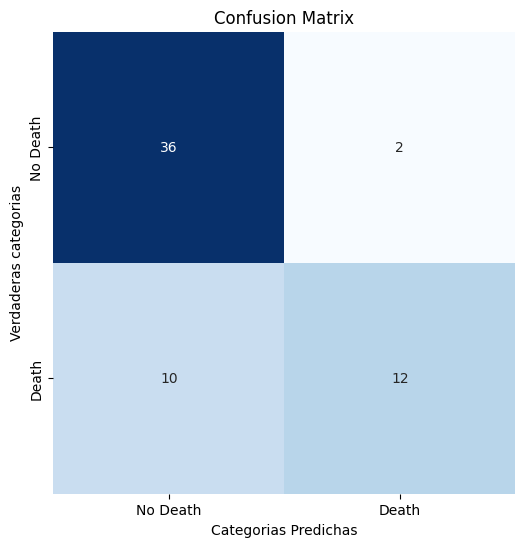

In [ ]:
# Crear la matriz de confusión
cm = confusion_matrix(test_labels, y_pred)

# Crear la figura y los ejes del gráfico
fig, ax = plt.subplots(figsize=(6, 6))

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['No Death', 'Death'],
            yticklabels=['No Death', 'Death'])

# Establecer etiquetas y título del gráfico
ax.set_xlabel('Categorias Predichas')
ax.set_ylabel('Verdaderas categorias')
ax.set_title('Confusion Matrix')

# Mostrar el gráfico
plt.show()

**Presicion de clasificacion correcta en el conjunto de datos de entrenamiento.**

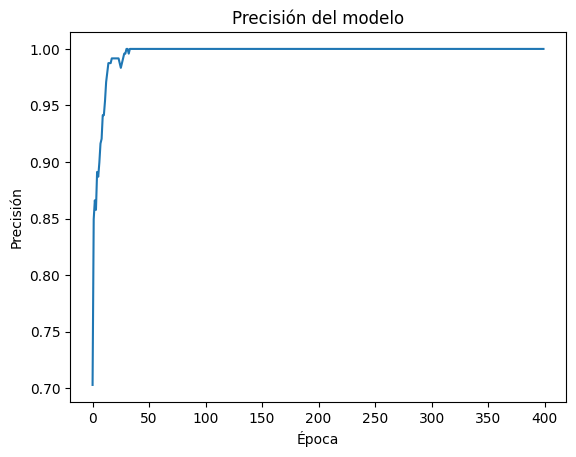

In [ ]:
plt.plot(history.history["accuracy"])
plt.title("Precisión del modelo")
plt.ylabel("Precisión")
plt.xlabel("Época")
plt.show()

**Muestras clasificadas correctamente por el modelo en el conjunto de datos de validación**

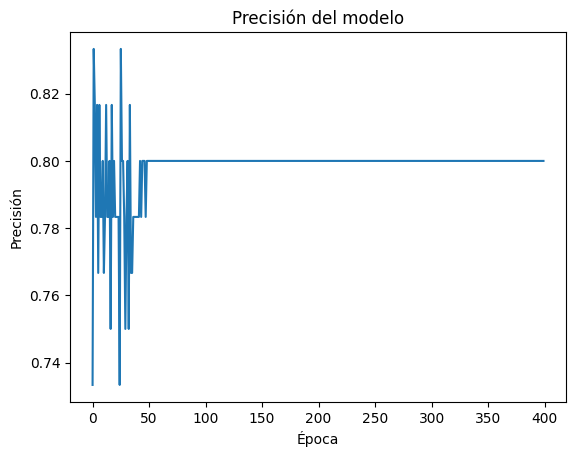

In [ ]:
plt.plot(history.history["val_accuracy"])
plt.title("Precisión del modelo")
plt.ylabel("Precisión")
plt.xlabel("Época")
plt.show()

**Ajuste a los datos de entrenamiento**

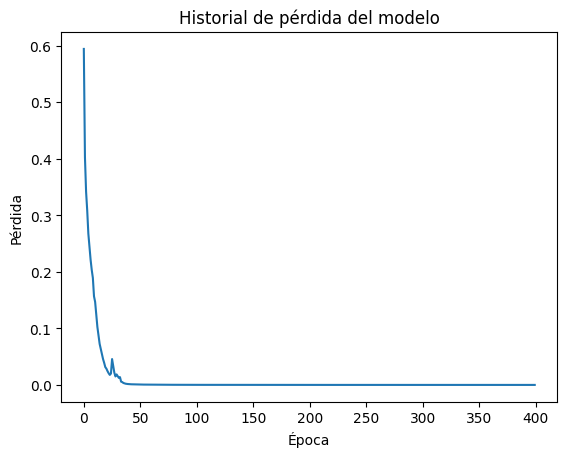

In [ ]:
plt.plot(history.history["loss"])
plt.title("Historial de pérdida del modelo")
plt.ylabel("Pérdida")
plt.xlabel("Época")
plt.show()

**Ajuste a los datos de validacion**

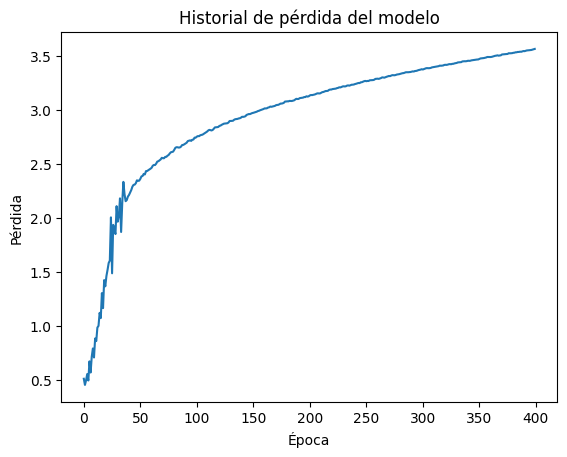

In [ ]:
plt.plot(history.history["val_loss"])
plt.title("Historial de pérdida del modelo")
plt.ylabel("Pérdida")
plt.xlabel("Época")
plt.show()

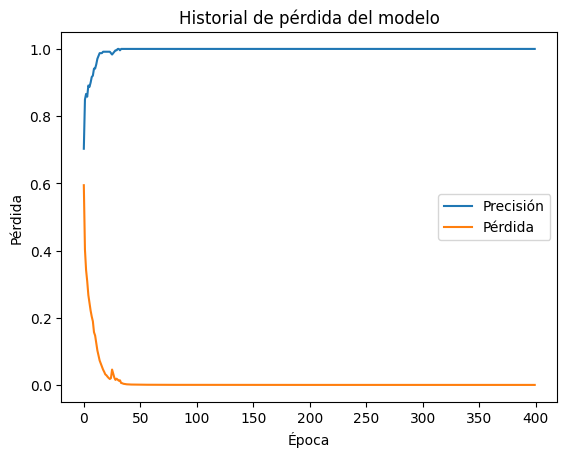

In [ ]:
# Gráfica de precisión del modelo
plt.plot(history.history["accuracy"])
plt.title("Precisión del modelo")
plt.ylabel("Precisión")
plt.xlabel("Época")

# Gráfica de pérdida del modelo
plt.plot(history.history["loss"])
plt.title("Historial de pérdida del modelo")
plt.ylabel("Pérdida")
plt.xlabel("Época")

# Mostrar la figura con ambas gráficas
plt.legend(["Precisión", "Pérdida"])
plt.show()

**CAPTURAS PARA COMPARACION**


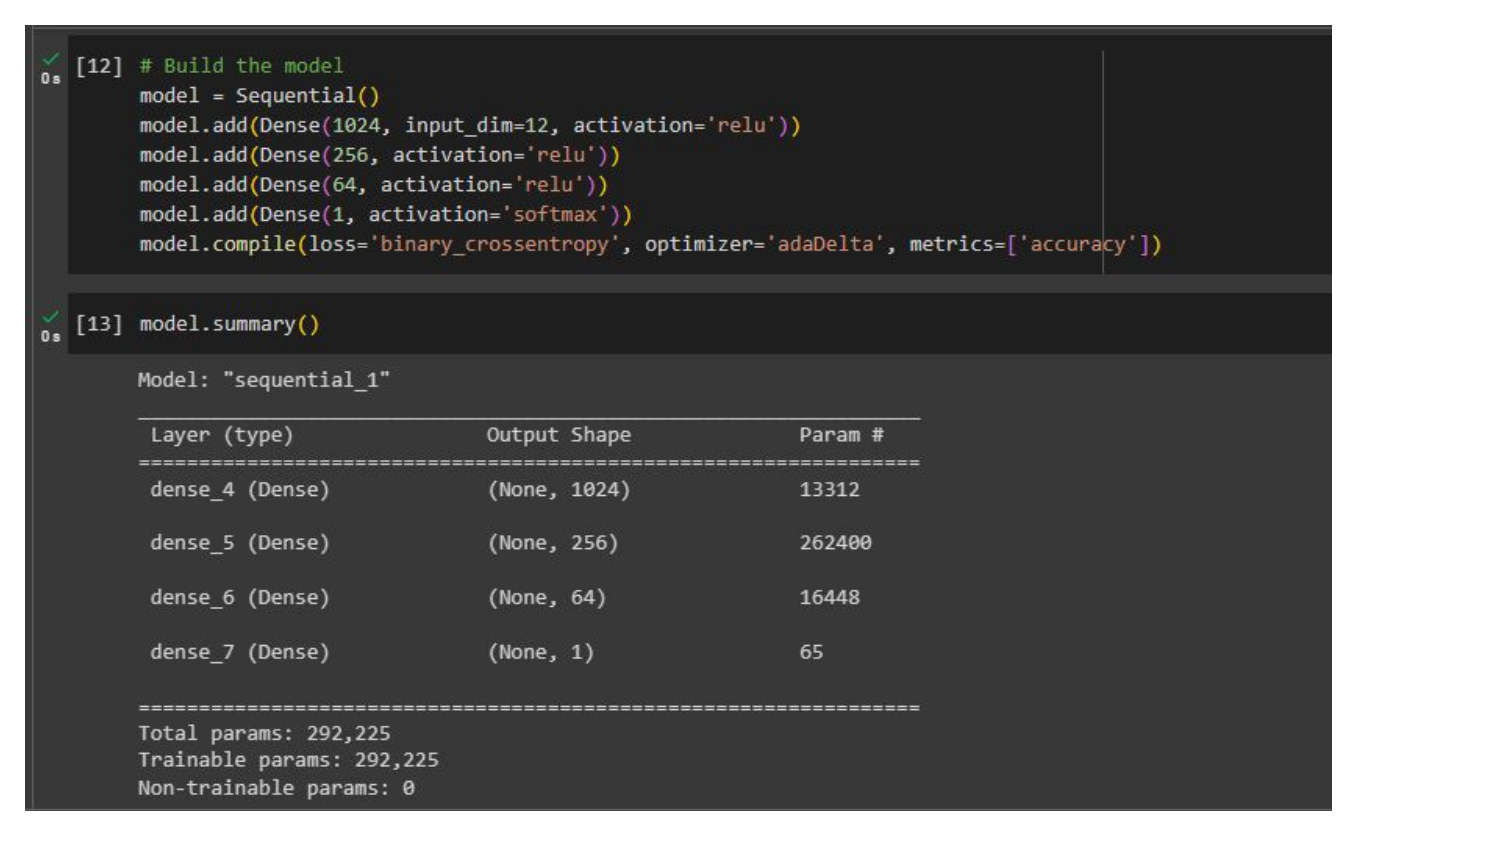


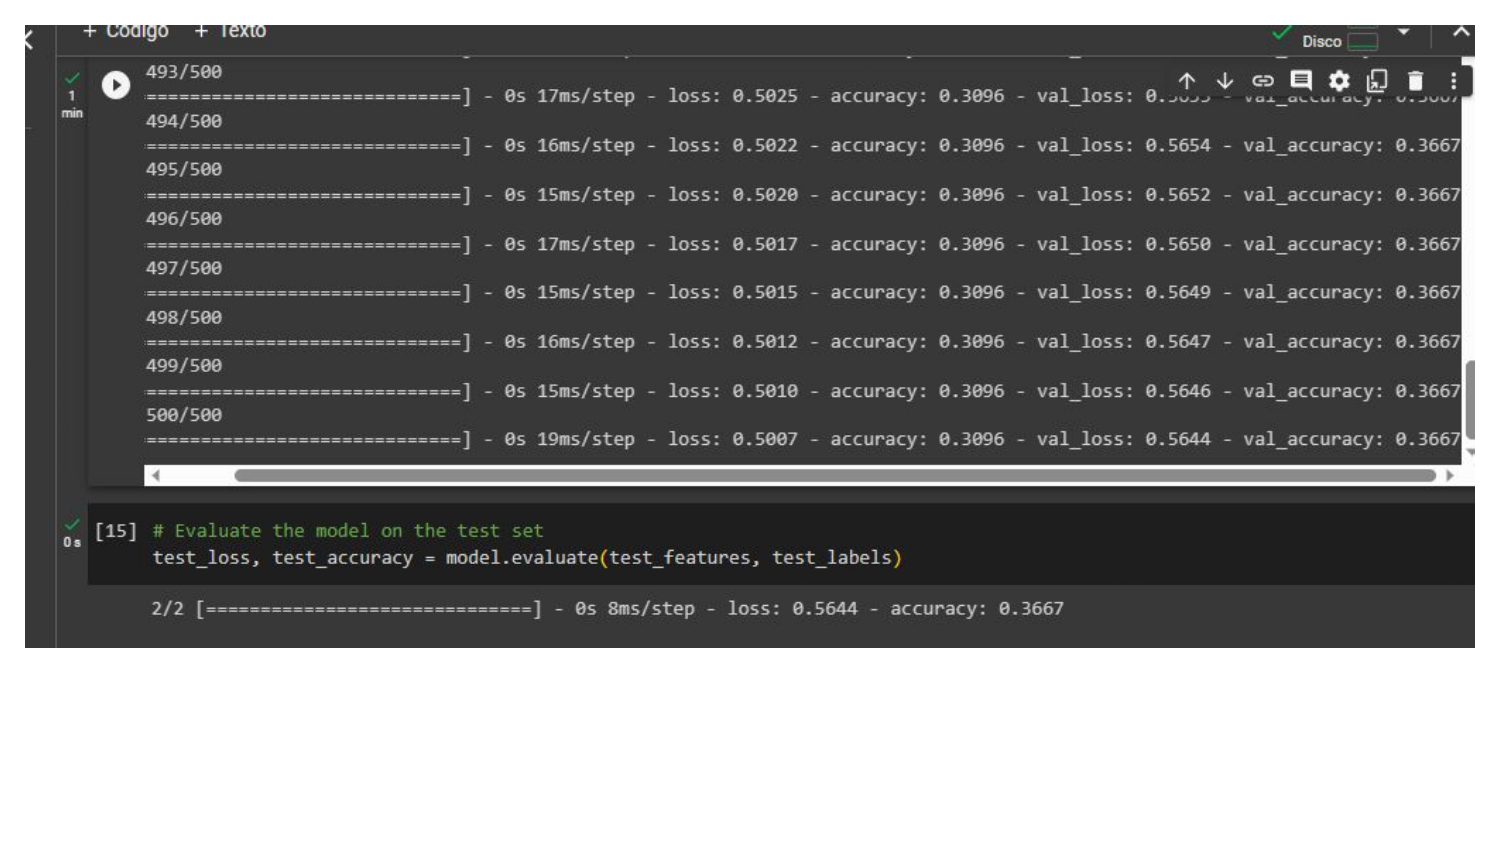

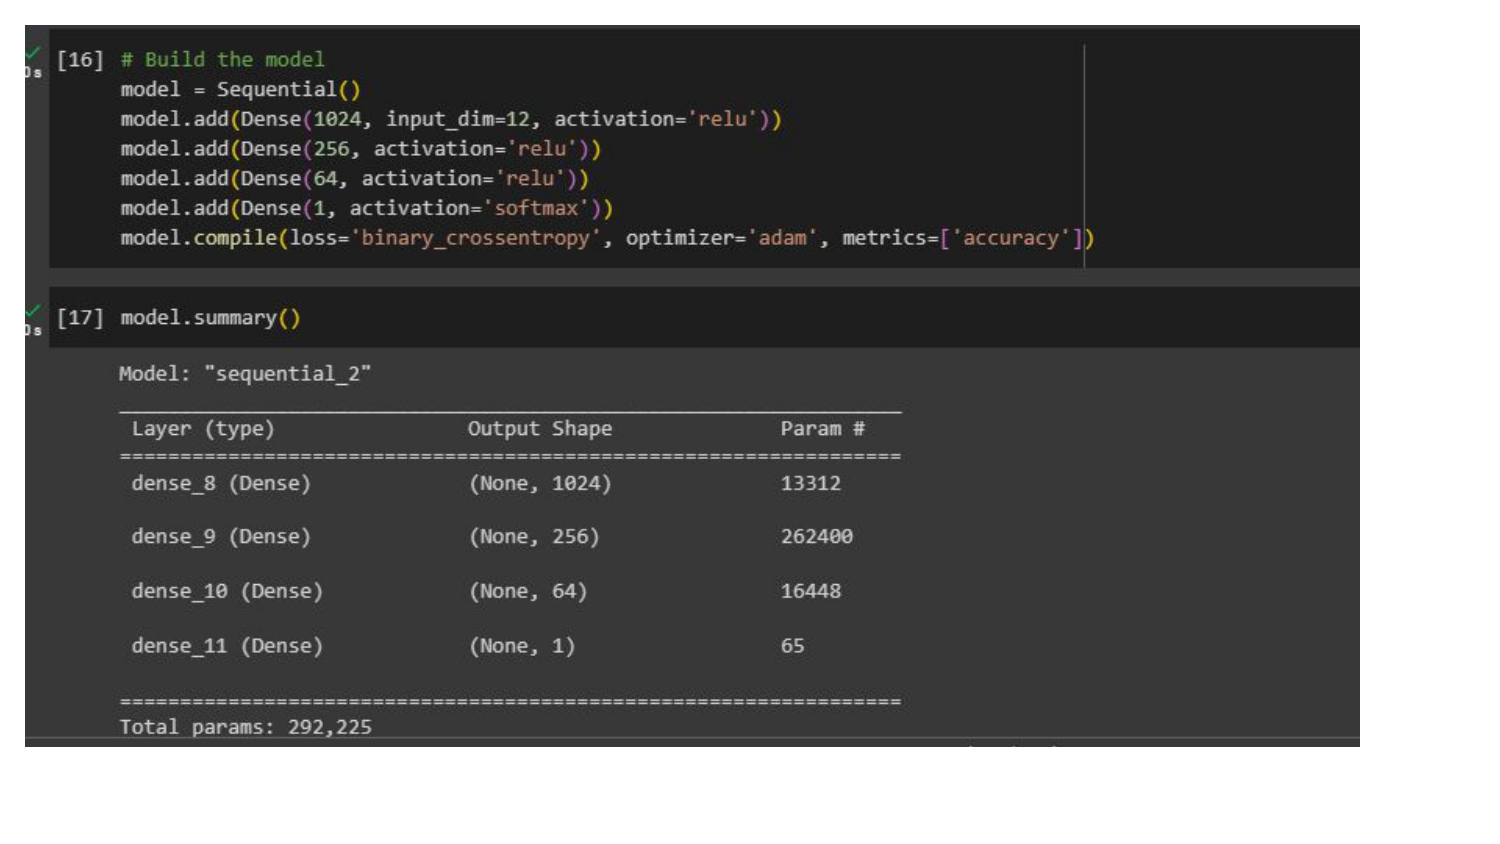

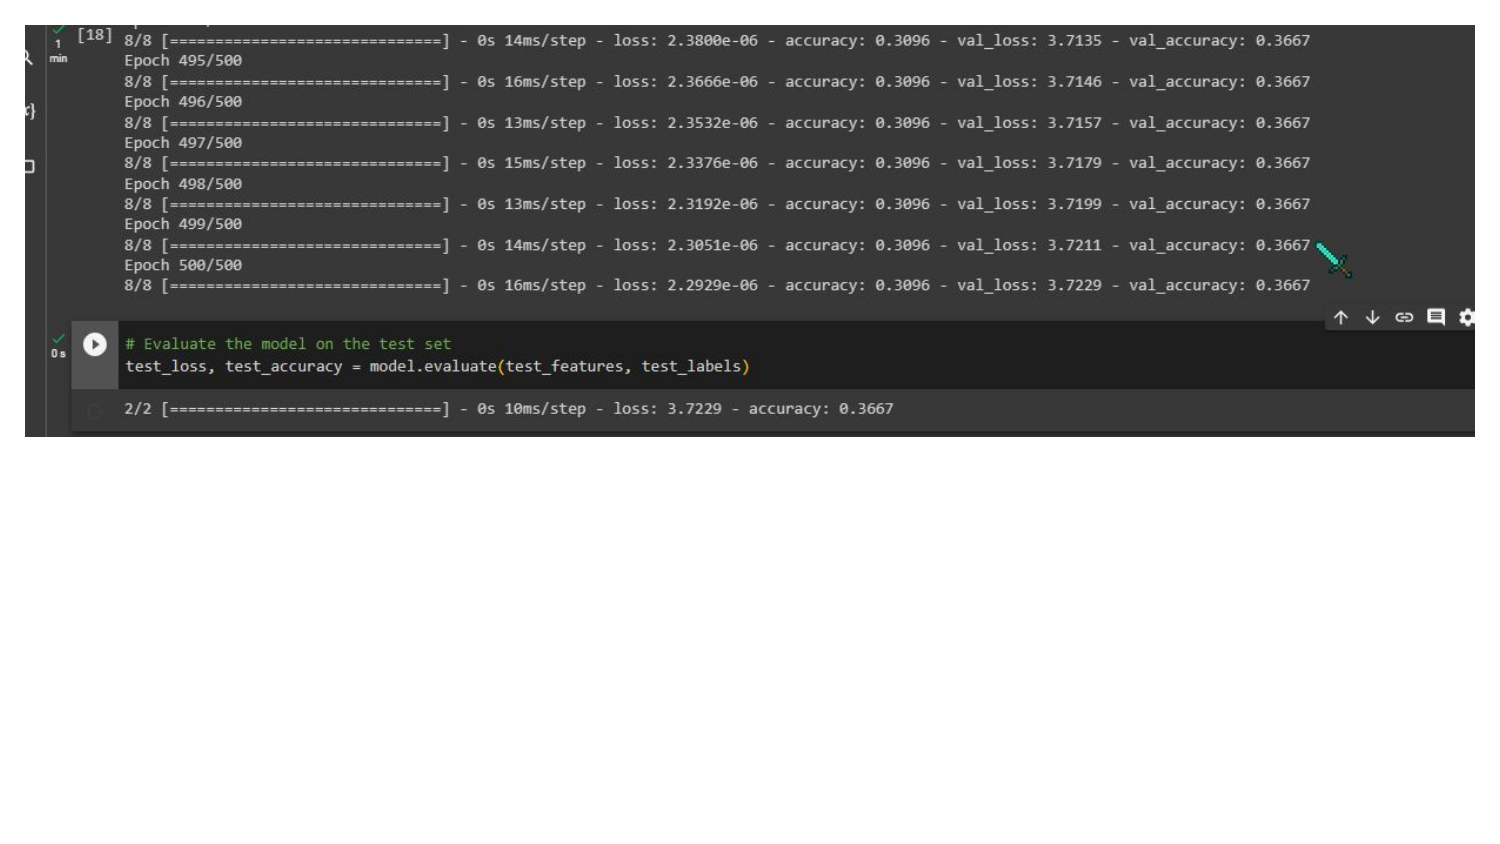